In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

masses_data = pd.read_csv('mammographic_masses.data.txt')
masses_data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [2]:
masses_data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [3]:
masses=masses_data.dropna()

masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


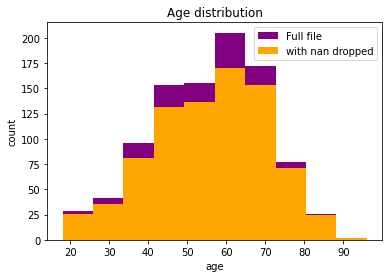

In [4]:
# Plot age distribution
plt.hist(masses_data["age"],color="purple",label="Full file")
plt.hist(masses["age"],color="orange",label = "with nan dropped")
plt.title("Age distribution")
plt.legend()
plt.xlabel("age")
plt.ylabel("count")
plt.show()

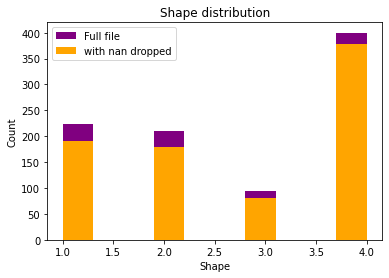

In [5]:
# Plot Shape distribution
plt.hist(masses_data["shape"],color="purple",label="Full file")
plt.hist(masses["shape"],color="orange",label = "with nan dropped")
plt.title("Shape distribution")
plt.legend()
plt.xlabel("Shape")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

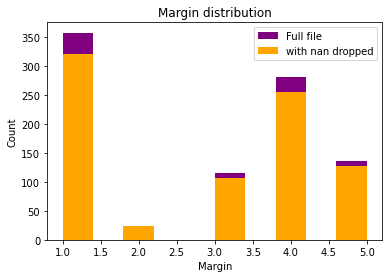

In [6]:
# Plot Margin distribution
plt.hist(masses_data["margin"],color="purple",label="Full file")
plt.hist(masses["margin"],color="orange",label = "with nan dropped")
plt.title("Margin distribution")
plt.legend()
plt.xlabel("Margin")
plt.ylabel("Count")

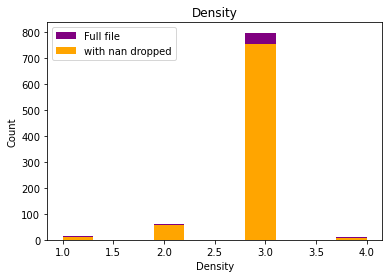

In [7]:
plt.show()

# Plot Density distribution
plt.hist(masses_data["density"],color="purple",label="Full file")
plt.hist(masses["density"],color="orange",label = "with nan dropped")
plt.title("Density")
plt.legend()
plt.xlabel("Density")
plt.ylabel("Count")
plt.show()

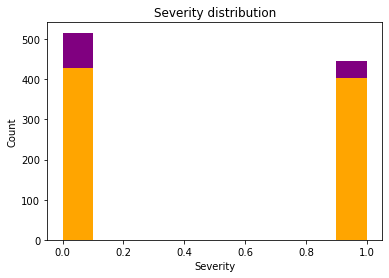

In [8]:


# Plot Shape distribution
plt.hist(masses_data["severity"],color="purple",label="Full file")
plt.hist(masses["severity"],color="orange",label = "with nan dropped")
plt.title("Severity distribution")
# plt.legend()
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

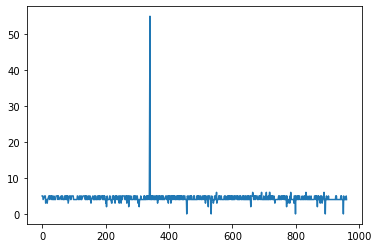

In [9]:
plt.plot(masses['BI-RADS'])


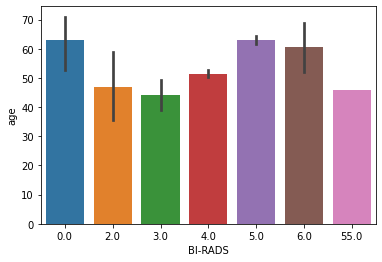

In [10]:
sb.barplot(masses['BI-RADS'], masses['age'])

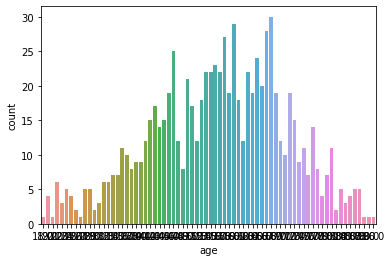

In [11]:
sb.countplot(masses['age'])

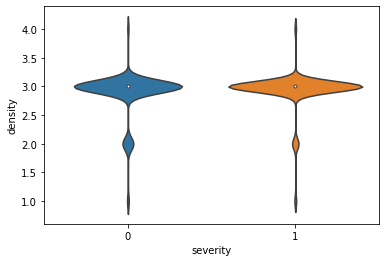

In [12]:
sb.violinplot(masses['severity'], masses['density'])


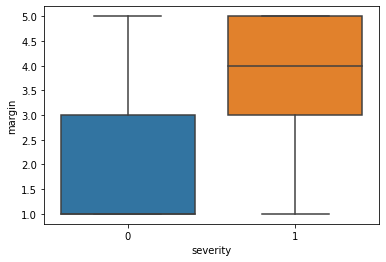

In [13]:
sb.boxplot(masses['severity'], masses['margin'])


In [14]:
masses_data.isnull().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

In [15]:
x= masses[['age', 'shape','margin', 'density']].values


y= masses['severity'].values


x

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [16]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(x)
scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

## Decision Trees



In [17]:
import numpy
from sklearn.model_selection import train_test_split


(training_inputs,testing_inputs,
 training_classes,testing_classes) = train_test_split(x,y, train_size=0.75, random_state=1)

In [18]:
from sklearn.tree import DecisionTreeClassifier

D= DecisionTreeClassifier(random_state=1)

D.fit(training_inputs, training_classes)


DecisionTreeClassifier(random_state=1)

In [19]:
pred=D.predict(testing_inputs)

In [20]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
accuracy_score(testing_classes,pred)


0.7403846153846154


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)


In [24]:
clf.fit(training_inputs, training_classes)

RandomForestClassifier(n_estimators=10, random_state=1)

In [25]:
pred=clf.predict(testing_inputs)

In [26]:
accuracy_score(testing_classes,pred)

0.7644230769230769

## SVM


In [27]:
from sklearn.svm import SVC

In [28]:
classifier=SVC(kernel='linear',random_state=0)

In [29]:
classifier.fit(training_inputs,training_classes)

SVC(kernel='linear', random_state=0)

In [30]:
y_pred=classifier.predict(testing_inputs)

In [31]:
accuracy_score(testing_classes,y_pred)

0.7692307692307693

## Neural Networks



In [35]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
cv_scores = cross_val_score(estimator,x,y, cv=10)
cv_scores.mean()


NameError: name 'cross_val_score' is not defined